## Descriptive Statistics

Descriptive statistics summarize and describe the main features of a dataset. They help understand the distribution and spread of data.

### Central Tendency
- **Mean**: The average value.
- **Median**: The middle value in sorted data.
- **Mode**: The most frequent value.

### Dispersion Measures
- **Range**: Difference between max and min.
- **Variance**: The average of squared differences from the mean.
- **Standard Deviation**: The square root of variance, representing spread.

### Skewness and Kurtosis
- **Skewness**: Measures the asymmetry of data. Positive skew = tail on the right.
- **Kurtosis**: Measures the "tailedness" of the distribution. High kurtosis = heavy tails.


## Central Tendency

In [11]:
#importing libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Load a real dataset - using seaborn's built-in 'tips' dataset
df = sns.load_dataset("tips")

# Select numerical columns
numerical_df = df.select_dtypes(include="number")


#calculating the mean, median and mode without API calling from Library
def mean(data):
  return sum(data)/len(data)

def median(data):
  data = sorted(data)
  if len(data) % 2 == 0:
    return (data[len(data)//2] + data[len(data)//2 - 1])/2
  else:
    return data[len(data)//2]

def mode(data):
  counts={}
  for value in data:
    if value in counts:
      counts[value]+=1
    else:
      counts[value]=1
  max_count= max(counts.values())
  modes= [key for key,value in counts.items() if value == max_count]
  return modes


CT_df = pd.DataFrame(columns=["Mean", "Median", "Mode"], index=numerical_df.columns)

for column in numerical_df.columns:
  CT_df.loc[column, "Mean"] = mean(numerical_df[column])
  CT_df.loc[column, "Median"] = median(numerical_df[column])
  CT_df.loc[column, "Mode"] = mode(numerical_df[column])

print('---------------------')
print('Calculated without lib')
print(CT_df)

#Calculating the using lib
CT_DF_2 = pd.DataFrame(columns=["Mean", "Median", "Mode"], index=numerical_df.columns)

for column in numerical_df.columns:
  CT_DF_2.loc[column, "Mean"] = numerical_df[column].mean()
  CT_DF_2.loc[column, "Median"] = numerical_df[column].median()
  CT_DF_2.loc[column,'Mode'] = numerical_df[column].mode()[0]

print('---------------------')
print('Calculated using lib')
print(CT_DF_2)


---------------------
Calculated without lib
                 Mean  Median     Mode
total_bill  19.785943  17.795  [13.42]
tip          2.998279     2.9    [2.0]
size         2.569672     2.0      [2]
---------------------
Calculated using lib
                 Mean  Median   Mode
total_bill  19.785943  17.795  13.42
tip          2.998279     2.9    2.0
size         2.569672     2.0      2


## Dispersion Measures

In [18]:
import math

#calculating variance, range and standard deviation without API

def mean(data):
  return sum(data)/len(data)

def range(data):
  return max(data) - min(data)

def variance(data):
    m = mean(data)
    return sum((x-m)**2 for x in data)/(len(data)-1)

def standard_deviation(data):
  return math.sqrt(variance(data))

Disperison_Df= pd.DataFrame(columns=["Range", "Variance", "Standard Deviation"], index=numerical_df.columns)

for column in numerical_df.columns:
  Disperison_Df.loc[column, "Range"] = range(numerical_df[column])
  Disperison_Df.loc[column, "Variance"] = variance(numerical_df[column])
  Disperison_Df.loc[column, "Standard Deviation"] = standard_deviation(numerical_df[column])

print('---------------------')
print('Calculated without lib')
print(Disperison_Df)


Disperison_Df_2= pd.DataFrame(columns=["Range","Variance","Standard Deviation"], index= numerical_df.columns)

for column in numerical_df.columns:
  Disperison_Df_2.loc[column, "Range"] = numerical_df[column].max() - numerical_df[column].min()
  Disperison_Df_2.loc[column,"Variance"] = numerical_df[column].var()
  Disperison_Df_2.loc[column,"Standard Deviation"] = numerical_df[column].std()

print('---------------------')
print('Calculated using lib')
print(Disperison_Df_2)

---------------------
Calculated without lib
            Range   Variance Standard Deviation
total_bill  47.74  79.252939           8.902412
tip           9.0   1.914455           1.383638
size            5   0.904591             0.9511
---------------------
Calculated using lib
            Range   Variance Standard Deviation
total_bill  47.74  79.252939           8.902412
tip           9.0   1.914455           1.383638
size            5   0.904591             0.9511


## Skewness and Kurtosis

*skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean*

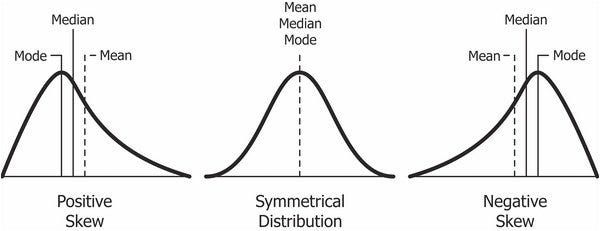

*Kurtosis is a measure of the tailedness of a distribution. Tailedness is how often outliers occur. Excess kurtosis is the tailedness of a distribution relative to a normal distribution. Distributions with medium kurtosis (medium tails) are mesokurtic*

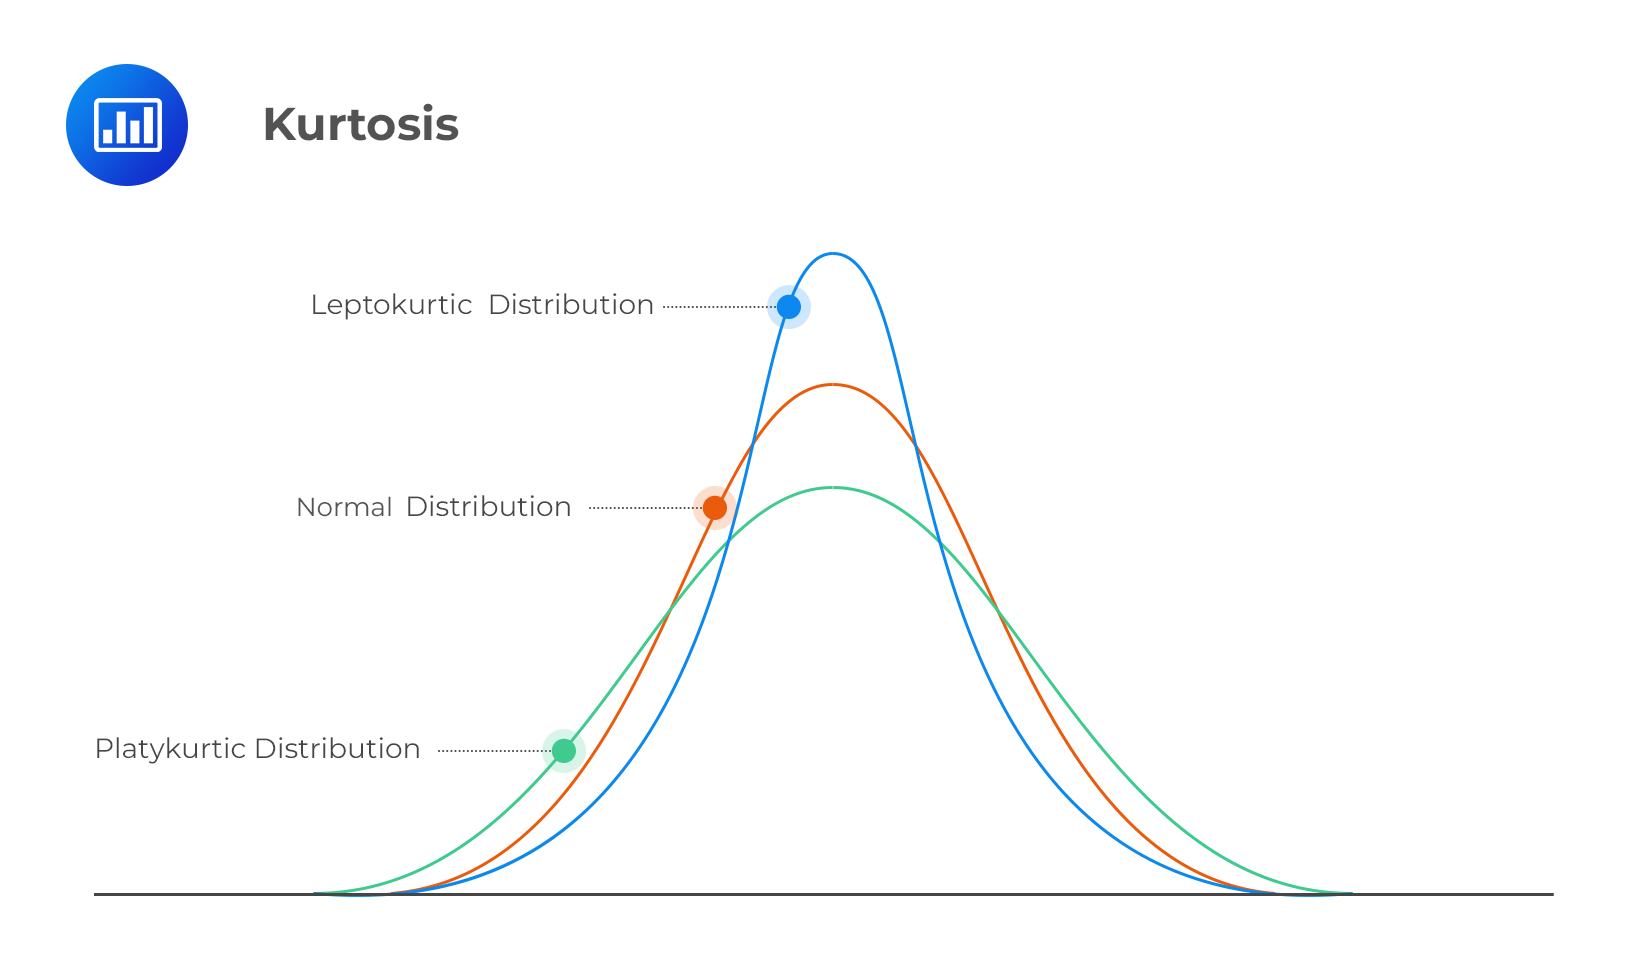

In [21]:
#calculating the skewness and kurtosis using lib
from scipy import stats

ST_df= pd.DataFrame(columns=["Skewness","Kurtosis"], index= numerical_df.columns)
for column in numerical_df.columns:
    ST_df.loc[column, "Skewness"] = stats.skew(numerical_df[column])
    ST_df.loc[column, "Kurtosis"] = stats.kurtosis(numerical_df[column])

print(ST_df)


            Skewness  Kurtosis
total_bill  1.126235  1.169168
tip         1.456427  3.549552
size        1.438965  1.671928


In [22]:
#calculating inbuilt function from pandas to desribe the summary of data
numerical_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000
